In [1]:
# To ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# sklearn-Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# sklearn - models
from sklearn.ensemble import RandomForestClassifier

# sklearn - metrics
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

## Read data

In [3]:
BASE_DIR= os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(BASE_DIR, 'Data','CICFlowMeter_merged_final.csv')
df = pd.read_csv(DATA_DIR)

## EDA

In [4]:
# To know shape of data
df.shape

(108500, 14)

In [5]:
# To see the first 5 rows of the data
df.head()

,duration,protocol_tcp,protocol_udp,src_port,dst_port,orig_bytes,resp_bytes,orig_pkts,resp_pkts,bytes_per_second,packets_per_second,packet_length_mean,packet_length_std,label
0,26672.0,1,0,52646,29639,486.0,42190.0,58.0,59.0,1.600030e+06,4386.622675,361.661017,558.736383,Benign
1,304.0,1,0,36817,6881,0.0,0.0,1.0,2.0,0.000000e+00,9868.421053,0.000000,0.000000,Benign
2,1103.0,0,1,46139,53,90.0,122.0,2.0,2.0,1.922031e+05,3626.473255,51.400000,8.763561,Benign
3,353.0,1,0,65133,1144,0.0,0.0,1.0,2.0,0.000000e+00,8498.583569,0.000000,0.000000,Benign
4,571137.0,1,0,56407,6881,1278.0,525432.0,220.0,435.0,9.222131e+05,1146.835173,802.911585,701.702106,Benign


In [6]:
# to know type of each column
df.dtypes

duration              float64
protocol_tcp            int64
protocol_udp            int64
src_port                int64
dst_port                int64
orig_bytes            float64
resp_bytes            float64
orig_pkts             float64
resp_pkts             float64
bytes_per_second      float64
packets_per_second    float64
packet_length_mean    float64
packet_length_std     float64
label                  object
dtype: object

In [7]:
# to know information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108500 entries, 0 to 108499
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration            108500 non-null  float64
 1   protocol_tcp        108500 non-null  int64  
 2   protocol_udp        108500 non-null  int64  
 3   src_port            108500 non-null  int64  
 4   dst_port            108500 non-null  int64  
 5   orig_bytes          108500 non-null  float64
 6   resp_bytes          108500 non-null  float64
 7   orig_pkts           108500 non-null  float64
 8   resp_pkts           108500 non-null  float64
 9   bytes_per_second    108500 non-null  float64
 10  packets_per_second  108500 non-null  float64
 11  packet_length_mean  108500 non-null  float64
 12  packet_length_std   108500 non-null  float64
 13  label               108500 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 11.6+ MB


In [8]:
# to see if data have null or no
df.isna().sum()

duration              0
protocol_tcp          0
protocol_udp          0
src_port              0
dst_port              0
orig_bytes            0
resp_bytes            0
orig_pkts             0
resp_pkts             0
bytes_per_second      0
packets_per_second    0
packet_length_mean    0
packet_length_std     0
label                 0
dtype: int64

In [9]:
# count unique values in target column
df['label'].value_counts()

label
Exploits                 30951
Fuzzers                  29613
Reconnaissance           16735
Benign                   10000
Fileless_Macro_Attack    10000
Generic                   4632
DoS                       4467
Shellcode                 2102
Name: count, dtype: int64

--------------

# VIZ

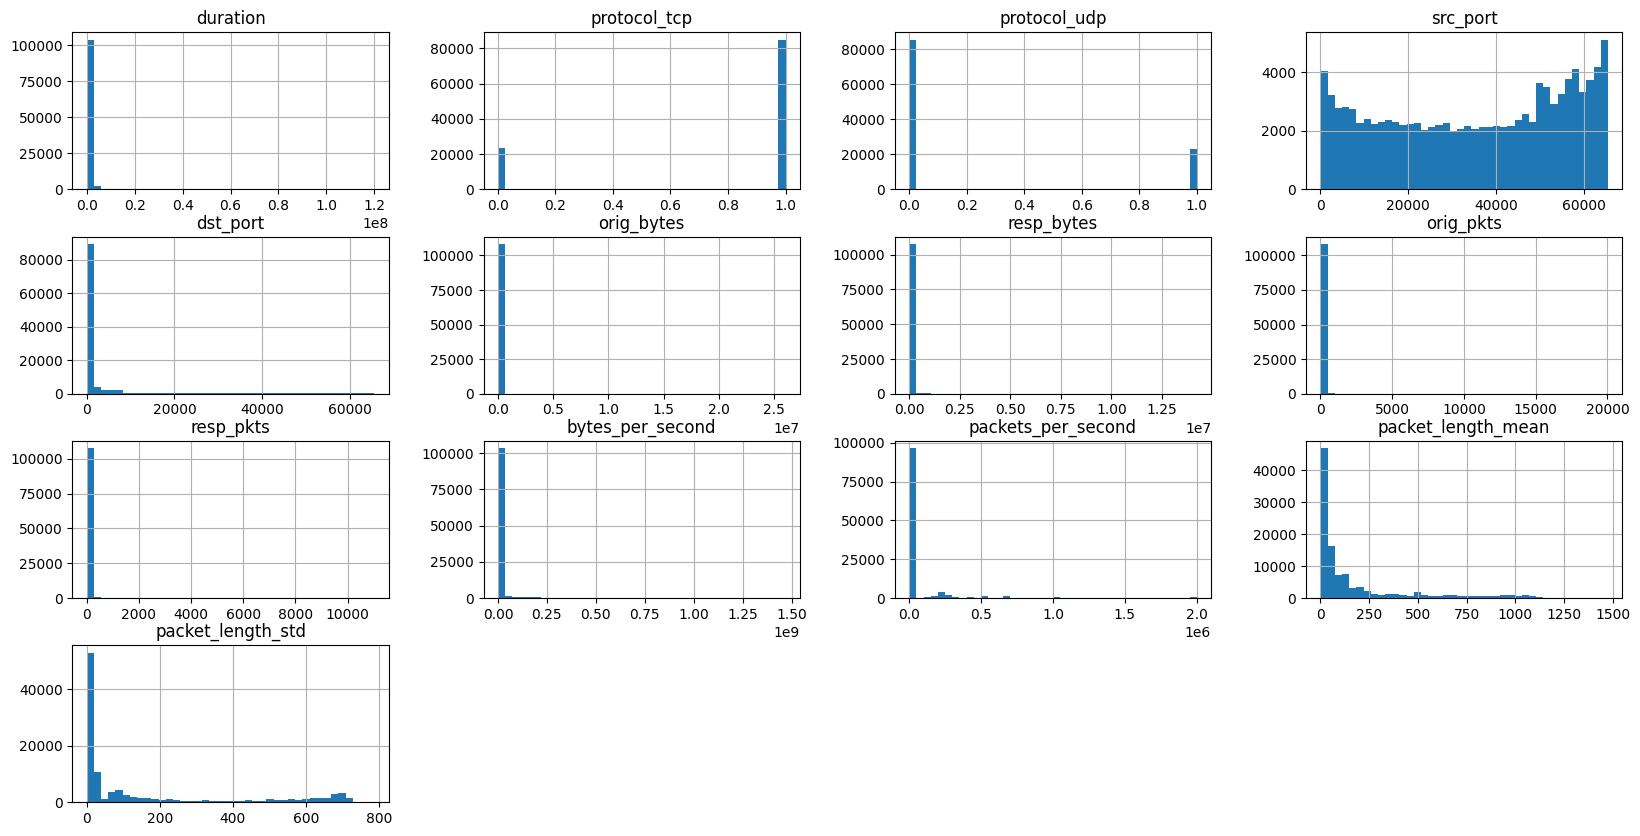

In [10]:
# check if data has outlier or no
df.hist(bins=40,figsize=(20,10))
plt.show()

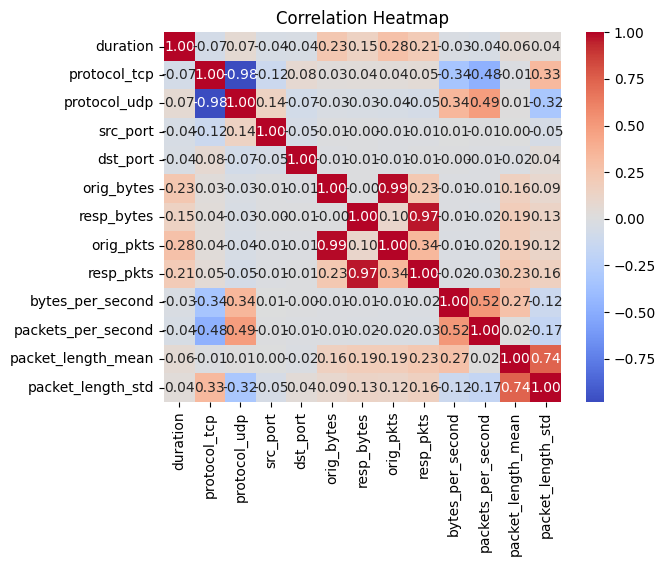

In [11]:
# Correlation between Features
df1=df.drop('label', axis=1)
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

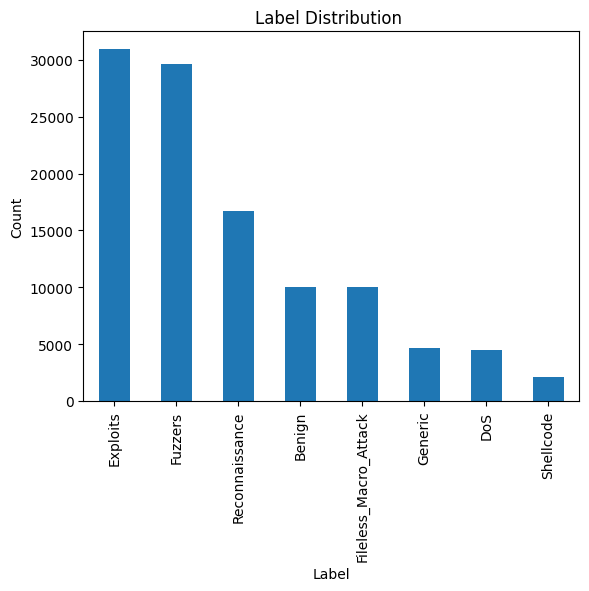

In [12]:
# to see distribution for label
df['label'].value_counts().plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title ("Label Distribution ")
plt.show()

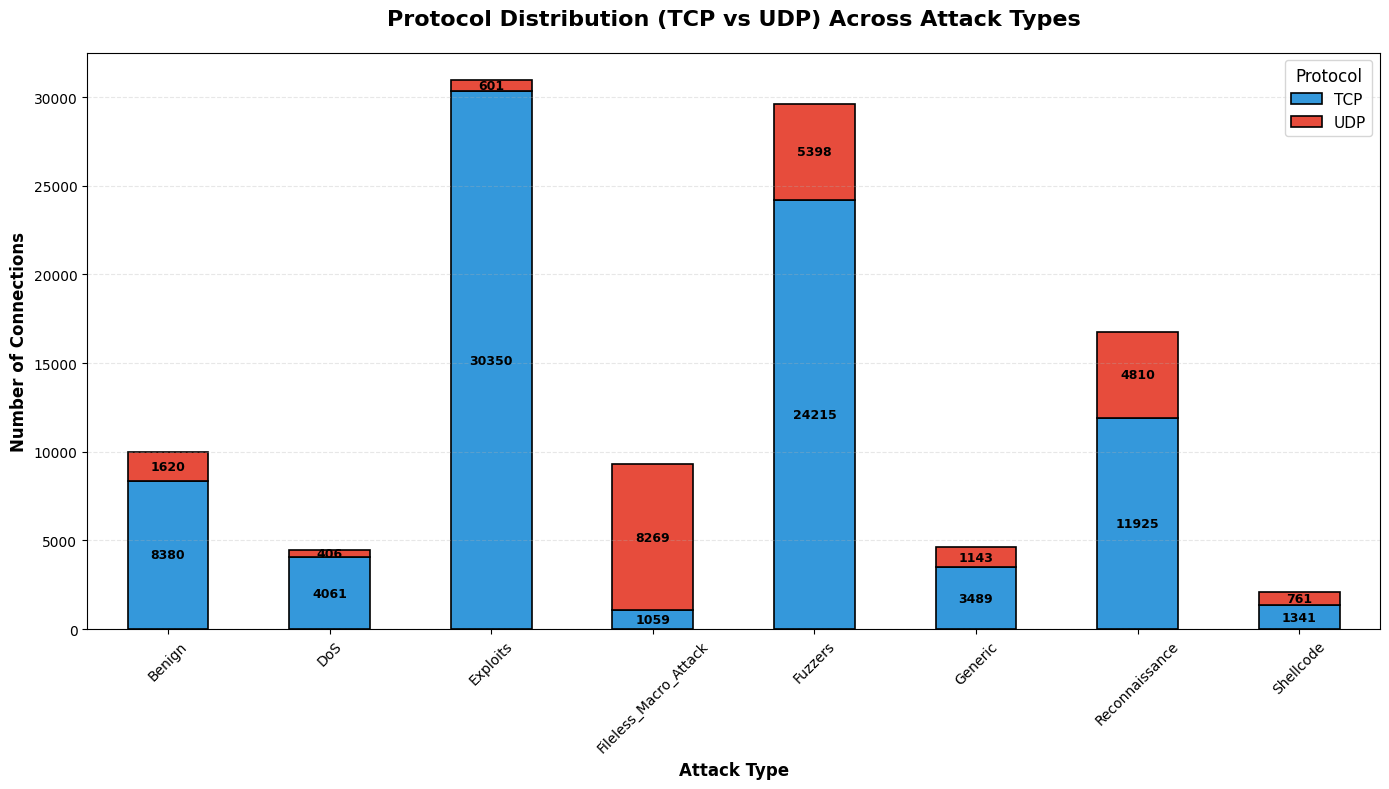

In [13]:
# Count tcp and udp for each attack
protocol_dist = df.groupby('label')[['protocol_tcp', 'protocol_udp']].sum()

# Draw stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

protocol_dist.plot(kind='bar', stacked=True, ax=ax, 
                   color=['#3498db', '#e74c3c'], 
                   edgecolor='black', linewidth=1.2)

ax.set_title('Protocol Distribution (TCP vs UDP) Across Attack Types', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Attack Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Connections', fontsize=12, fontweight='bold')
ax.legend(['TCP', 'UDP'], title='Protocol', fontsize=11, title_fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# add values to bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

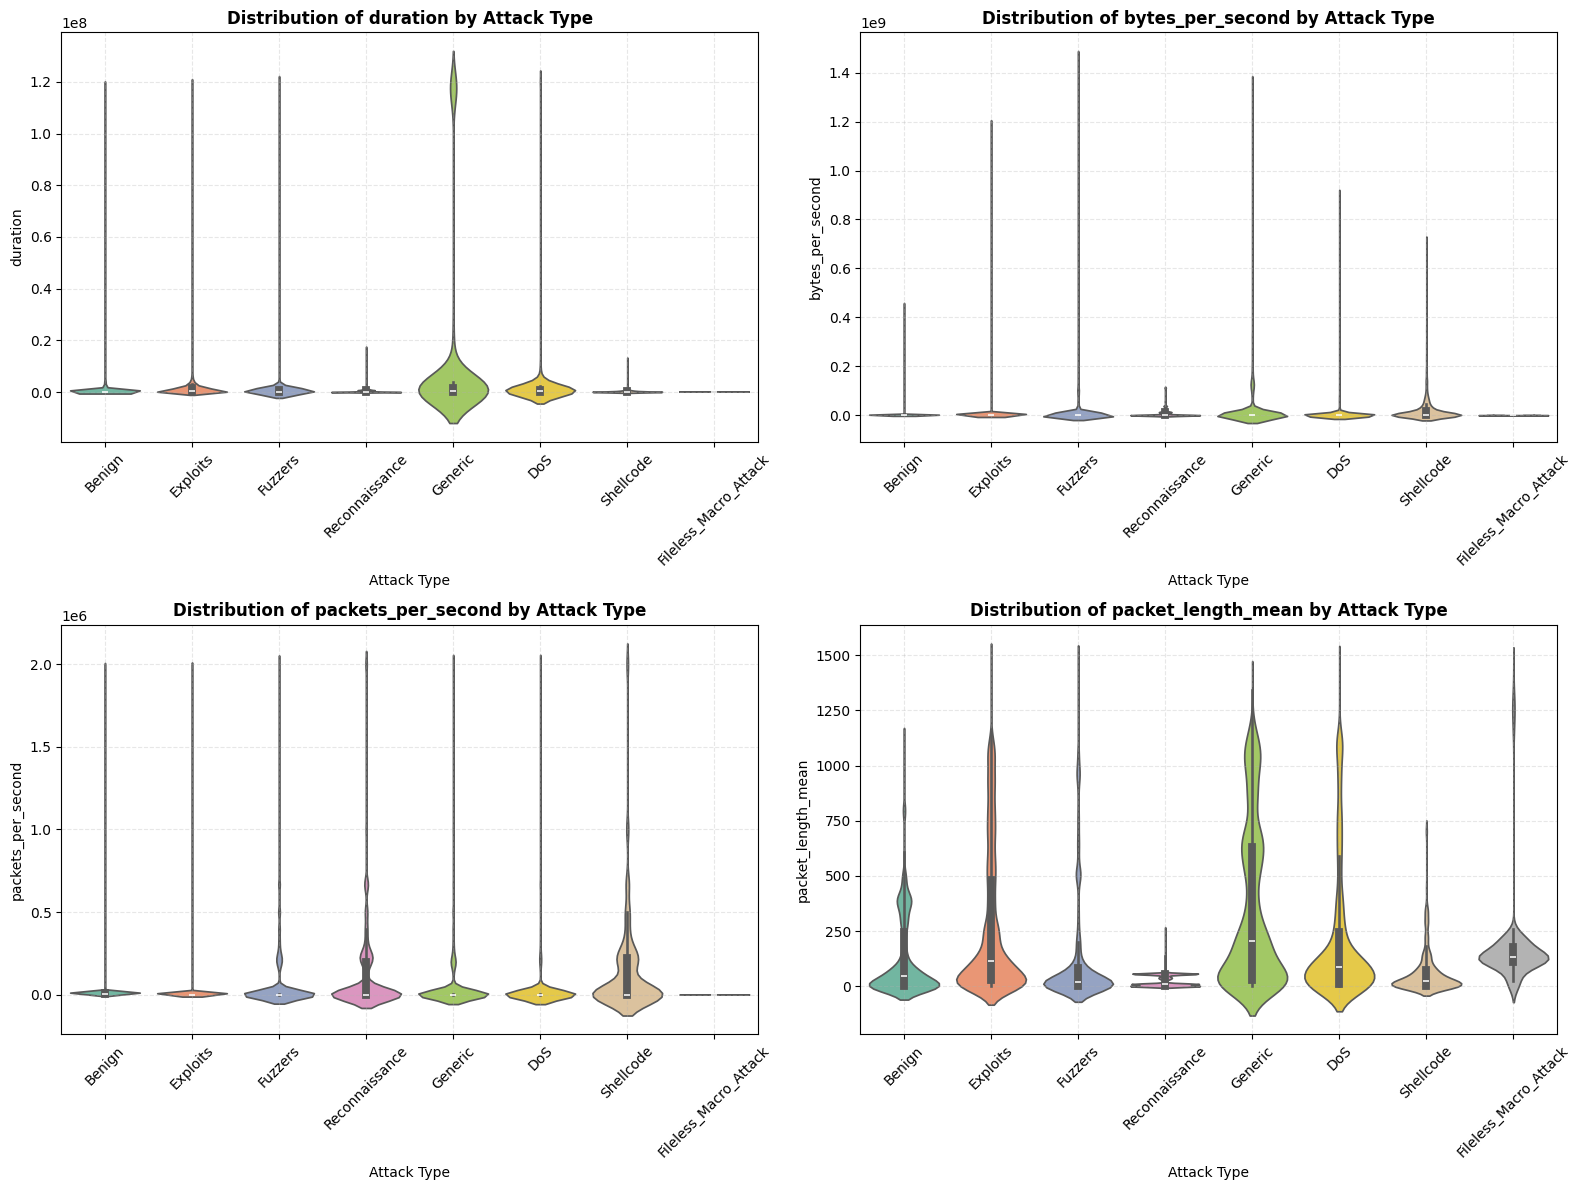

In [ ]:
# select features to plot
features_to_plot = ['duration', 'bytes_per_second', 'packets_per_second', 'packet_length_mean']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    
    # Violin plot
    sns.violinplot(data=df, x='label', y=feature, ax=ax, palette='Set2')
    
    ax.set_title(f'Distribution of {feature} by Attack Type', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Attack Type', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

-----------------

* `Splitting Dataset to train & test` 

In [15]:
# Split X & y
X = df.drop(columns=['label'], axis=1)
y = df['label']

In [16]:
# Split to train & test folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, shuffle=True, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (92225, 13)
y_train.shape 	 (92225,)
******************************
X_test.shape 	 (16275, 13)
y_test.shape 	 (16275,)


---------

# pre_processing 

In [17]:
X_train.dtypes

duration              float64
protocol_tcp            int64
protocol_udp            int64
src_port                int64
dst_port                int64
orig_bytes            float64
resp_bytes            float64
orig_pkts             float64
resp_pkts             float64
bytes_per_second      float64
packets_per_second    float64
packet_length_mean    float64
packet_length_std     float64
dtype: object

In [18]:
num_cols=['duration','src_port','dst_port','orig_bytes','resp_bytes','orig_pkts','resp_pkts','bytes_per_second',
           'packets_per_second','packet_length_mean','packet_length_std']
ready_cols=['protocol_tcp','protocol_udp']

In [19]:
# Pipeline

# Numerical: num_cols --> Imputing using median, and StandardScaler
# Ready Cols: ready_cols --> Imputing mode


# For Numerical
num_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
                ])



# For Ready Cols
ready_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent'))
                ])



# Combine all secondary pipelines into one total pipeline
all_pipeline = ColumnTransformer(transformers=[
                    ('numerical', num_pipeline, num_cols),
                    ('ready', ready_pipeline, ready_cols)
                ])


# Apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)


In [20]:
pd.DataFrame(X_train_final)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.181779,-1.484996,-0.313749,0.126769,-0.062842,0.148184,0.035263,-0.179064,-0.257512,1.892439,2.310795,1.0,0.0
1,-0.052647,0.418661,-0.308816,-0.051957,-0.059104,-0.059921,-0.065339,-0.179405,-0.257581,-0.108508,0.647024,1.0,0.0
2,-0.151488,0.219744,-0.308816,-0.053160,-0.067936,-0.075929,-0.096777,-0.179450,-0.257373,-0.621398,-0.652831,1.0,0.0
3,-0.074848,0.655703,-0.308816,-0.052202,-0.064407,-0.059921,-0.077914,-0.179424,-0.257575,-0.343067,-0.084760,1.0,0.0
4,-0.162286,1.043011,-0.311238,-0.052962,-0.066947,-0.083729,-0.102474,-0.179247,-0.257210,-0.186635,-0.598644,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92220,-0.103215,-0.012787,-0.308816,-0.051920,-0.063410,-0.051917,-0.077914,-0.179400,-0.257513,-0.311190,0.038484,1.0,0.0
92221,-0.116473,-0.946111,-0.308816,-0.051237,-0.067936,-0.063923,-0.077914,-0.179420,-0.257511,-0.438818,-0.149591,1.0,0.0
92222,-0.153548,-0.218058,-0.308816,-0.053160,-0.067936,-0.075929,-0.096777,-0.179450,-0.257305,-0.621398,-0.652831,1.0,0.0
92223,-0.160170,0.681992,-0.299937,-0.053160,-0.067936,-0.075929,-0.096777,-0.179450,-0.256195,-0.621398,-0.652831,1.0,0.0


In [21]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

##### `Save Pipline`

In [22]:
# Dump the pipeline locally 
joblib.dump(all_pipeline, os.path.join(ARTIFACTS_FOLDER_PATH, 'pipeline.pkl'))

['e:\\projects ML\\Network_attack\\notebooks\\..\\artifacts\\pipeline.pkl']

In [23]:
# covert objcet to numbers
le=LabelEncoder()
y_train_final=le.fit_transform(y_train)
y_test_final=le.transform(y_test)

In [24]:
# to see label after label encoding
pd.DataFrame(y_train_final)

,0
0,2
1,2
2,2
3,1
4,3
...,...
92220,1
92221,2
92222,2
92223,4


In [25]:
# Dump label encoder locally 
joblib.dump(le, os.path.join(ARTIFACTS_FOLDER_PATH, 'label_encoder.pkl'))

['e:\\projects ML\\Network_attack\\notebooks\\..\\artifacts\\label_encoder.pkl']

-----------------

# Building Model

* `Using Random Forest`

In [36]:
#  Using class_weight
forest_clf = RandomForestClassifier(criterion='gini', n_estimators=5, 
                                    max_depth=20,class_weight='balanced',random_state=45)
forest_clf.fit(X_train_final, y_train_final)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using f1_score
f1_train_forest = f1_score(y_train_final, y_pred_train_forest,average='weighted')
f1_test_forest = f1_score(y_test_final, y_pred_test_foerst,average='weighted')

print(f'The f1_score using RF model for Training Dataset  is {f1_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset is {f1_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset  is 93.098
The f1_score using RF model for Testing Dataset is 88.158


In [37]:
# another Metrics
precision = precision_score(y_test_final, y_pred_test_foerst,average='weighted')
recall = recall_score(y_test_final, y_pred_test_foerst,average='weighted')
accuracy = accuracy_score(y_test_final, y_pred_test_foerst)


print(f"🎯 Accuracy using RF : {accuracy*100:.2f}%")
print(f"✅ Precision using RF : {precision*100:.2f}%")
print(f"🔁 Recall using RF   : {recall*100:.2f}%")


metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})
display(metrics_df)

🎯 Accuracy using RF : 88.18%
✅ Precision using RF : 88.17%
🔁 Recall using RF   : 88.18%


,Metric,Value
0,Accuracy,0.881843
1,Precision,0.881730
2,Recall,0.881843


## Save Model

In [38]:
# Dump model locally 
joblib.dump(forest_clf, os.path.join(ARTIFACTS_FOLDER_PATH, 'Random_forest.pkl'))

['e:\\projects ML\\Network_attack\\notebooks\\..\\artifacts\\Random_forest.pkl']

-----------

## Inference

In [ ]:
# 1️⃣ Load saved pipeline and label encoder
loaded_pipeline = joblib.load(os.path.join(ARTIFACTS_FOLDER_PATH, 'pipeline.pkl'))
loaded_label_encoder = joblib.load(os.path.join(ARTIFACTS_FOLDER_PATH, 'label_encoder.pkl'))

# 2️⃣ Choose a sample from the test set
sample_index = 201   # Change the number to select a different row
sample_X = X_test.iloc[[sample_index]]   # DataFrame with 1 row
sample_y_true = y_test.iloc[sample_index]

print("🔹 Input sample:")
display(sample_X)

# 3️⃣ Transform and predict
sample_X_transformed = loaded_pipeline.transform(sample_X)
sample_pred_encoded = forest_clf.predict(sample_X_transformed)[0]

# 👇 4️⃣ Get prediction probabilities
sample_pred_proba = forest_clf.predict_proba(sample_X_transformed)[0]

# 5️⃣ Decode label back to original name
sample_pred_label = loaded_label_encoder.inverse_transform([sample_pred_encoded])[0]

# 6️⃣ Show result
print(f"\n✅ True label: {sample_y_true}")
print(f"🤖 Model prediction: {sample_pred_label}")

# 👇 7️⃣ Show probability for the predicted label
predicted_label_index = sample_pred_encoded
confidence = sample_pred_proba[predicted_label_index] * 100
print(f"📊 Confidence: {confidence:.2f}%")

# 👇 8️⃣ Show all probabilities for all labels
print(f"\n📋 All class probabilities:")
all_labels = loaded_label_encoder.classes_
for label, prob in zip(all_labels, sample_pred_proba):
    print(f"   {label:20s}: {prob*100:6.2f}%")

🔹 Input sample:


,duration,protocol_tcp,protocol_udp,src_port,dst_port,orig_bytes,resp_bytes,orig_pkts,resp_pkts,bytes_per_second,packets_per_second,packet_length_mean,packet_length_std
42758,56283.0,1,0,39699,179,0.0,0.0,3.0,2.0,0.0,88.836771,0.0,0.0



✅ True label: Fuzzers
🤖 Model prediction: Fuzzers
📊 Confidence: 79.06%

📋 All class probabilities:
   Benign              :   0.90%
   DoS                 :   9.80%
   Exploits            :   3.89%
   Fileless_Macro_Attack:   0.00%
   Fuzzers             :  79.06%
   Generic             :   5.49%
   Reconnaissance      :   0.00%
   Shellcode           :   0.86%


----------------